# Overhead experiment, various state sizes
Results are obtained via code commit: https://github.com/wzorgdrager/stateful_dataflows/commit/17dd83dd193654dea32735d24d737a023734bb25 

In [18]:
import pandas as pd
from matplotlib import rcParams, rc
import matplotlib
import matplotlib.font_manager as font_manager
import matplotlib.ticker as mticker

# Add every font at the specified location
font_dir = ['.']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    
rcParams['font.family'] = 'Verdana'
rcParams['figure.figsize'] = [11, 7]
rcParams['figure.dpi'] = 400 # 200 e.g. is really fine, but slower
import matplotlib.pyplot as plt

In [2]:
fiftykb_data = pd.read_csv("50KB_one_invocation.csv")
fiftykb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,4999.50000,0.029880,0.047178,0.010128,0.007668
std,2886.89568,2886.89568,0.006816,0.009331,0.002873,0.002398
min,0.00000,0.00000,0.022113,0.036609,0.007006,0.005328
25%,2499.75000,2499.75000,0.025163,0.041033,0.008502,0.006493
50%,4999.50000,4999.50000,0.028778,0.045415,0.009766,0.007322
75%,7499.25000,7499.25000,0.031848,0.049398,0.010785,0.008075
max,9999.00000,9999.00000,0.085626,0.149661,0.065313,0.037976


In [3]:
fivehundredkb_data = pd.read_csv("500KB_one_invocation.csv")
fivehundredkb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,4999.50000,0.141793,0.049730,0.011389,0.009092
std,2886.89568,2886.89568,0.026287,0.010019,0.003352,0.002622
min,0.00000,0.00000,0.105155,0.038257,0.007875,0.006428
25%,2499.75000,2499.75000,0.125981,0.043752,0.009780,0.008028
50%,4999.50000,4999.50000,0.133887,0.046793,0.010623,0.008656
75%,7499.25000,7499.25000,0.147651,0.051202,0.011654,0.009276
max,9999.00000,9999.00000,0.444248,0.129521,0.046447,0.043862


In [4]:
fivemb_data = pd.read_csv("5MB_one_invocation.csv")
fivemb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,4999.50000,6.515933,0.064543,0.016222,0.011418
std,2886.89568,2886.89568,1.684562,0.018676,0.009650,0.005464
min,0.00000,0.00000,3.204221,0.042845,0.009742,0.008033
25%,2499.75000,2499.75000,6.694643,0.053866,0.012714,0.009971
50%,4999.50000,4999.50000,6.973030,0.059037,0.014667,0.010543
75%,7499.25000,7499.25000,7.425553,0.071612,0.017903,0.011331
max,9999.00000,9999.00000,28.340192,0.468395,0.597145,0.245794


In [5]:
fiftymb_data = pd.read_csv("50MB_one_invocation.csv")
fiftymb_data.describe()

fiftymb_data.std()

Unnamed: 0                      2886.895680
REPETITION                      2886.895680
STATE_SERIALIZATION_DURATION      10.169043
EVENT_SERIALIZATION_DURATION       0.010953
ROUTING_DURATION                   0.005076
ACTOR_CONSTRUCTION                 0.002741
dtype: float64

In [23]:
fiftykb_mean = fiftykb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].mean().to_frame(name="50KB")
fivehundredkb_mean = fivehundredkb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].mean().to_frame(name="500KB")
fivemb_mean = fivemb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].mean().to_frame(name="5MB")
fiftymb_mean = fiftymb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].mean().to_frame(name="50MB")


fiftykb_std = fiftykb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].std().to_frame(name="50KB")
fivehundredkb_std = fivehundredkb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].std().to_frame(name="500KB")
fivemb_std = fivemb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].std().to_frame(name="5MB")
fiftymb_std = fiftymb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].std().to_frame(name="50MB")


overhead_mean = pd.concat([fiftykb_mean, fivehundredkb_mean, fivemb_mean, fiftymb_mean], axis=1)
overhead_std = pd.concat([fiftykb_std, fivehundredkb_std, fivemb_std, fiftymb_std], axis=1)
print(overhead_mean)
print(overhead_std)

                                  50KB     500KB       5MB       50MB
ACTOR_CONSTRUCTION            0.007668  0.009092  0.011418   0.010396
ROUTING_DURATION              0.010128  0.011389  0.016222   0.018386
EVENT_SERIALIZATION_DURATION  0.047178  0.049730  0.064543   0.062814
STATE_SERIALIZATION_DURATION  0.029880  0.141793  6.515933  90.039465
                                  50KB     500KB       5MB       50MB
ACTOR_CONSTRUCTION            0.002398  0.002622  0.005464   0.002741
ROUTING_DURATION              0.002873  0.003352  0.009650   0.005076
EVENT_SERIALIZATION_DURATION  0.009331  0.010019  0.018676   0.010953
STATE_SERIALIZATION_DURATION  0.006816  0.026287  1.684562  10.169043


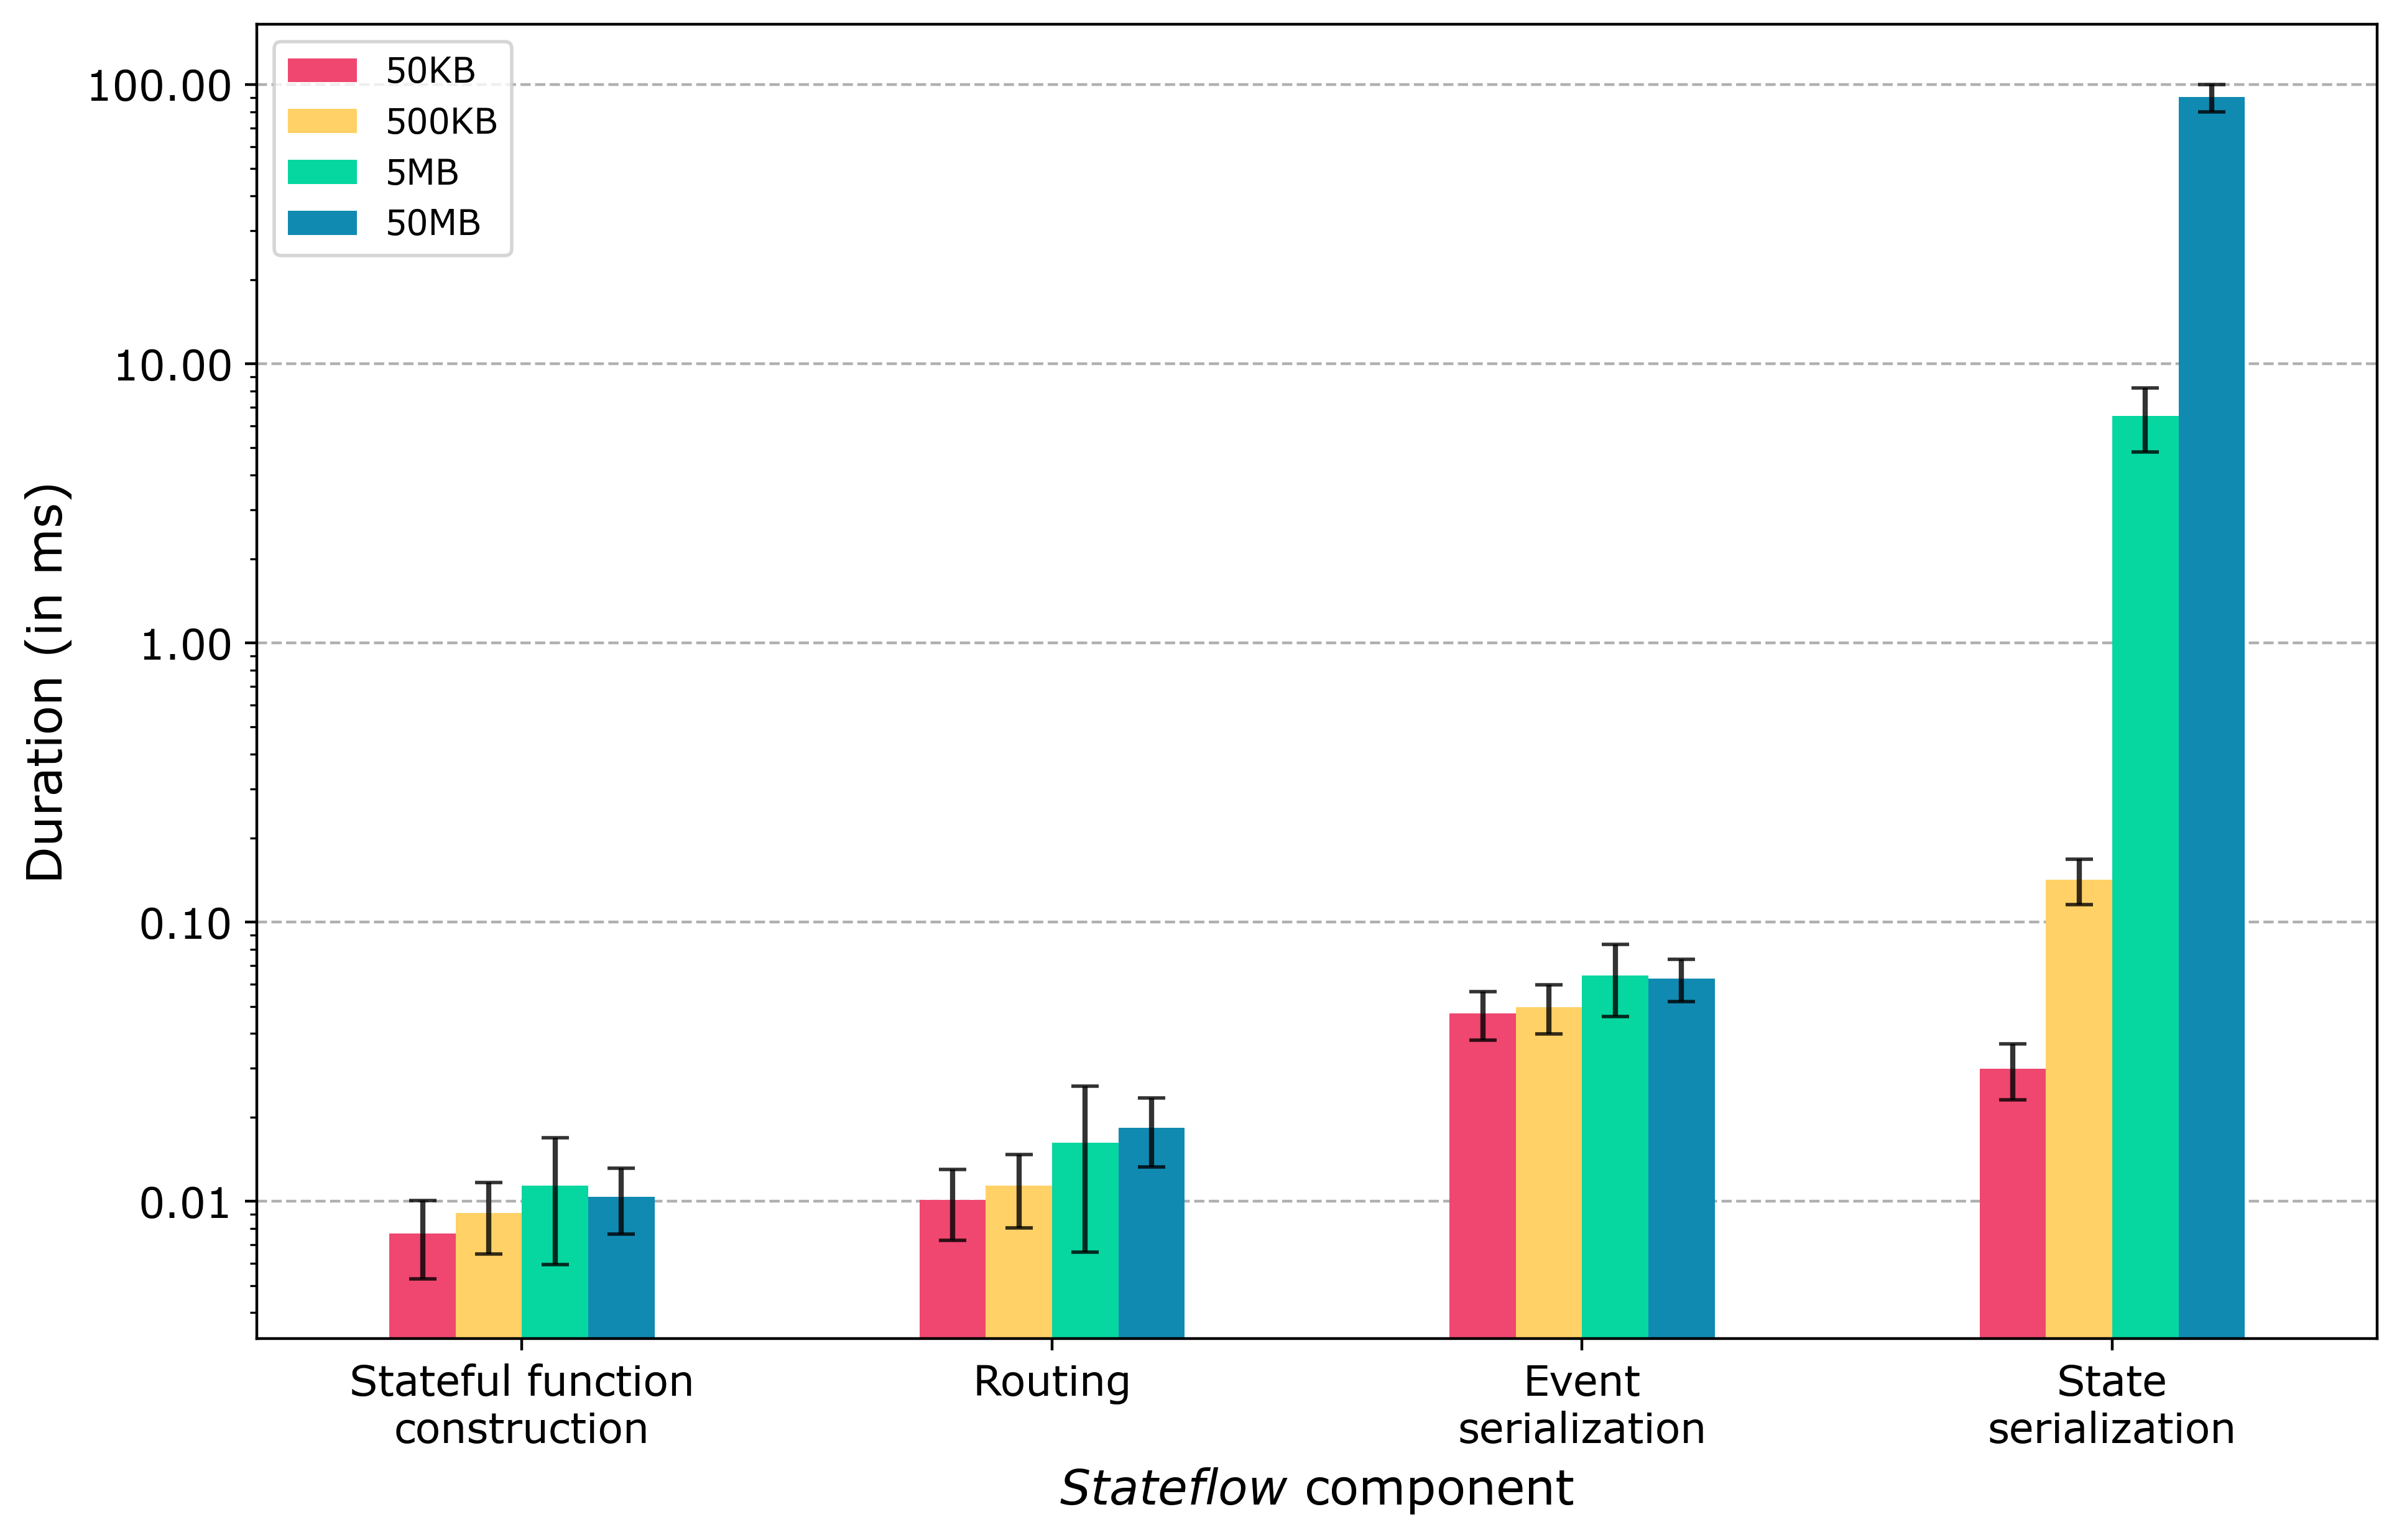

In [24]:
ax = overhead_mean.plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=overhead_std, rot=0, fontsize=12, capsize=4, ecolor='black', error_kw={"alpha": 0.80})
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
ax.set_yscale('log')
ax.set_ylabel("Duration (in ms)", fontsize=14)
ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
ax.set_xticklabels(["Stateful function\nconstruction", "Routing", "Event\nserialization", "State\nserialization"])
#ax.set_title(r"Duration of components in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))
plt.show()

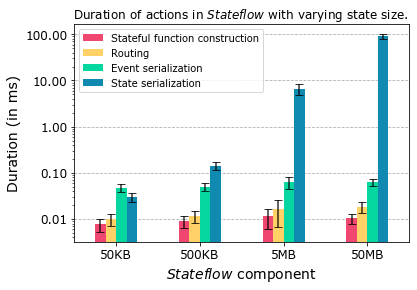

In [8]:
new_overhead = overhead_mean.rename({"ACTOR_CONSTRUCTION": "Stateful function construction", "ROUTING_DURATION": "Routing", "EVENT_SERIALIZATION_DURATION": "Event serialization", "STATE_SERIALIZATION_DURATION": "State serialization"}).transpose()
new_std = overhead_std.rename({"ACTOR_CONSTRUCTION": "Stateful function construction", "ROUTING_DURATION": "Routing", "EVENT_SERIALIZATION_DURATION": "Event serialization", "STATE_SERIALIZATION_DURATION": "State serialization"}).transpose()

ax = new_overhead.plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=new_std, rot=0, fontsize=12, capsize=4, ecolor='black', error_kw={"alpha": 0.80})
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
ax.set_yscale('log')
ax.set_ylabel("Duration (in ms)", fontsize=14)
ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
ax.set_title(r"Duration of actions in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))

plt.show()

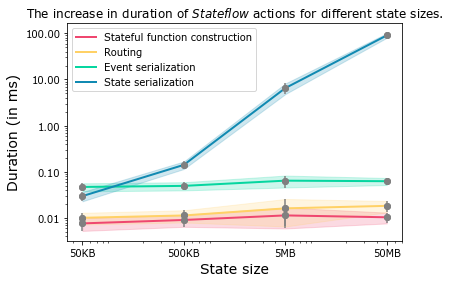

In [9]:
actor = overhead_mean.loc["ACTOR_CONSTRUCTION"]
route = overhead_mean.loc["ROUTING_DURATION"]
event = overhead_mean.loc["EVENT_SERIALIZATION_DURATION"]
state = overhead_mean.loc["STATE_SERIALIZATION_DURATION"]

actor_std = overhead_std.loc["ACTOR_CONSTRUCTION"]
route_std = overhead_std.loc["ROUTING_DURATION"]
event_std = overhead_std.loc["EVENT_SERIALIZATION_DURATION"]
state_std = overhead_std.loc["STATE_SERIALIZATION_DURATION"]

x = [50, 500, 5000, 50000]
plt.fill_between(x, actor-actor_std, actor+actor_std, color="#ef476f",  alpha=0.2)
plt.fill_between(x, route-route_std, route+route_std, color="#ffd166",   alpha=0.2)
plt.fill_between(x, event-event_std, event+event_std, color="#06d6a0",alpha=0.2)
plt.fill_between(x, state-state_std, state+state_std, color="#118ab2",alpha=0.2)

plt.plot(x, actor, color="#ef476f", label="Stateful function construction", linewidth=2)
plt.plot(x, route, color="#ffd166", label="Routing", linewidth=2)
plt.plot(x, event, color="#06d6a0", label="Event serialization", linewidth=2)
plt.plot(x, state, color="#118ab2", label="State serialization", linewidth=2)

plt.plot(x, actor, 'o', color="gray")
plt.plot(x, route, 'o', color="gray")
plt.plot(x, event,'o', color="gray")
plt.plot(x, state, 'o',color="gray")

plt.errorbar(x, actor, actor_std, linestyle="None", marker='o', color="gray")
plt.errorbar(x, route, route_std, linestyle="None", marker='o', color="gray")
plt.errorbar(x, event, event_std, linestyle="None", marker='o', color="gray")
plt.errorbar(x, state, state_std, linestyle="None", marker='o',color="gray")
ax = plt.gca()

plt.yscale('log')
plt.xscale('log')
plt.xticks(x, ["50KB", "500KB", "5MB", "50MB"])
plt.ylabel("Duration (in ms)",fontsize=14)
plt.xlabel("State size", fontsize=14)
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))

plt.legend()
plt.title(r"The increase in duration of $Stateflow$ actions for different state sizes.")
plt.show()


# Overhead experiment, various execution graph lengths, no interaction
Results are obtained via code commit: add

In [10]:
eg_10_data = pd.read_csv("execution_graph_length_10.csv")
eg_10_data.describe()

,Unnamed: 0,REPETITION,STATE_SIZE,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION,EXECUTION_GRAPH_TRAVERSAL
count,10000.00000,10000.00000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,4999.50000,0.0,0.038039,0.104787,0.021656,0.009213,0.088594
std,2886.89568,2886.89568,0.0,0.010917,0.021434,0.006238,0.003264,0.016173
min,0.00000,0.00000,0.0,0.023543,0.074568,0.013370,0.005758,0.069833
25%,2499.75000,2499.75000,0.0,0.030197,0.089010,0.017630,0.007687,0.078003
50%,4999.50000,4999.50000,0.0,0.035587,0.098680,0.019805,0.008491,0.082363
75%,7499.25000,7499.25000,0.0,0.043413,0.117247,0.024263,0.009784,0.095932
max,9999.00000,9999.00000,0.0,0.132303,0.233078,0.070532,0.044950,0.225209


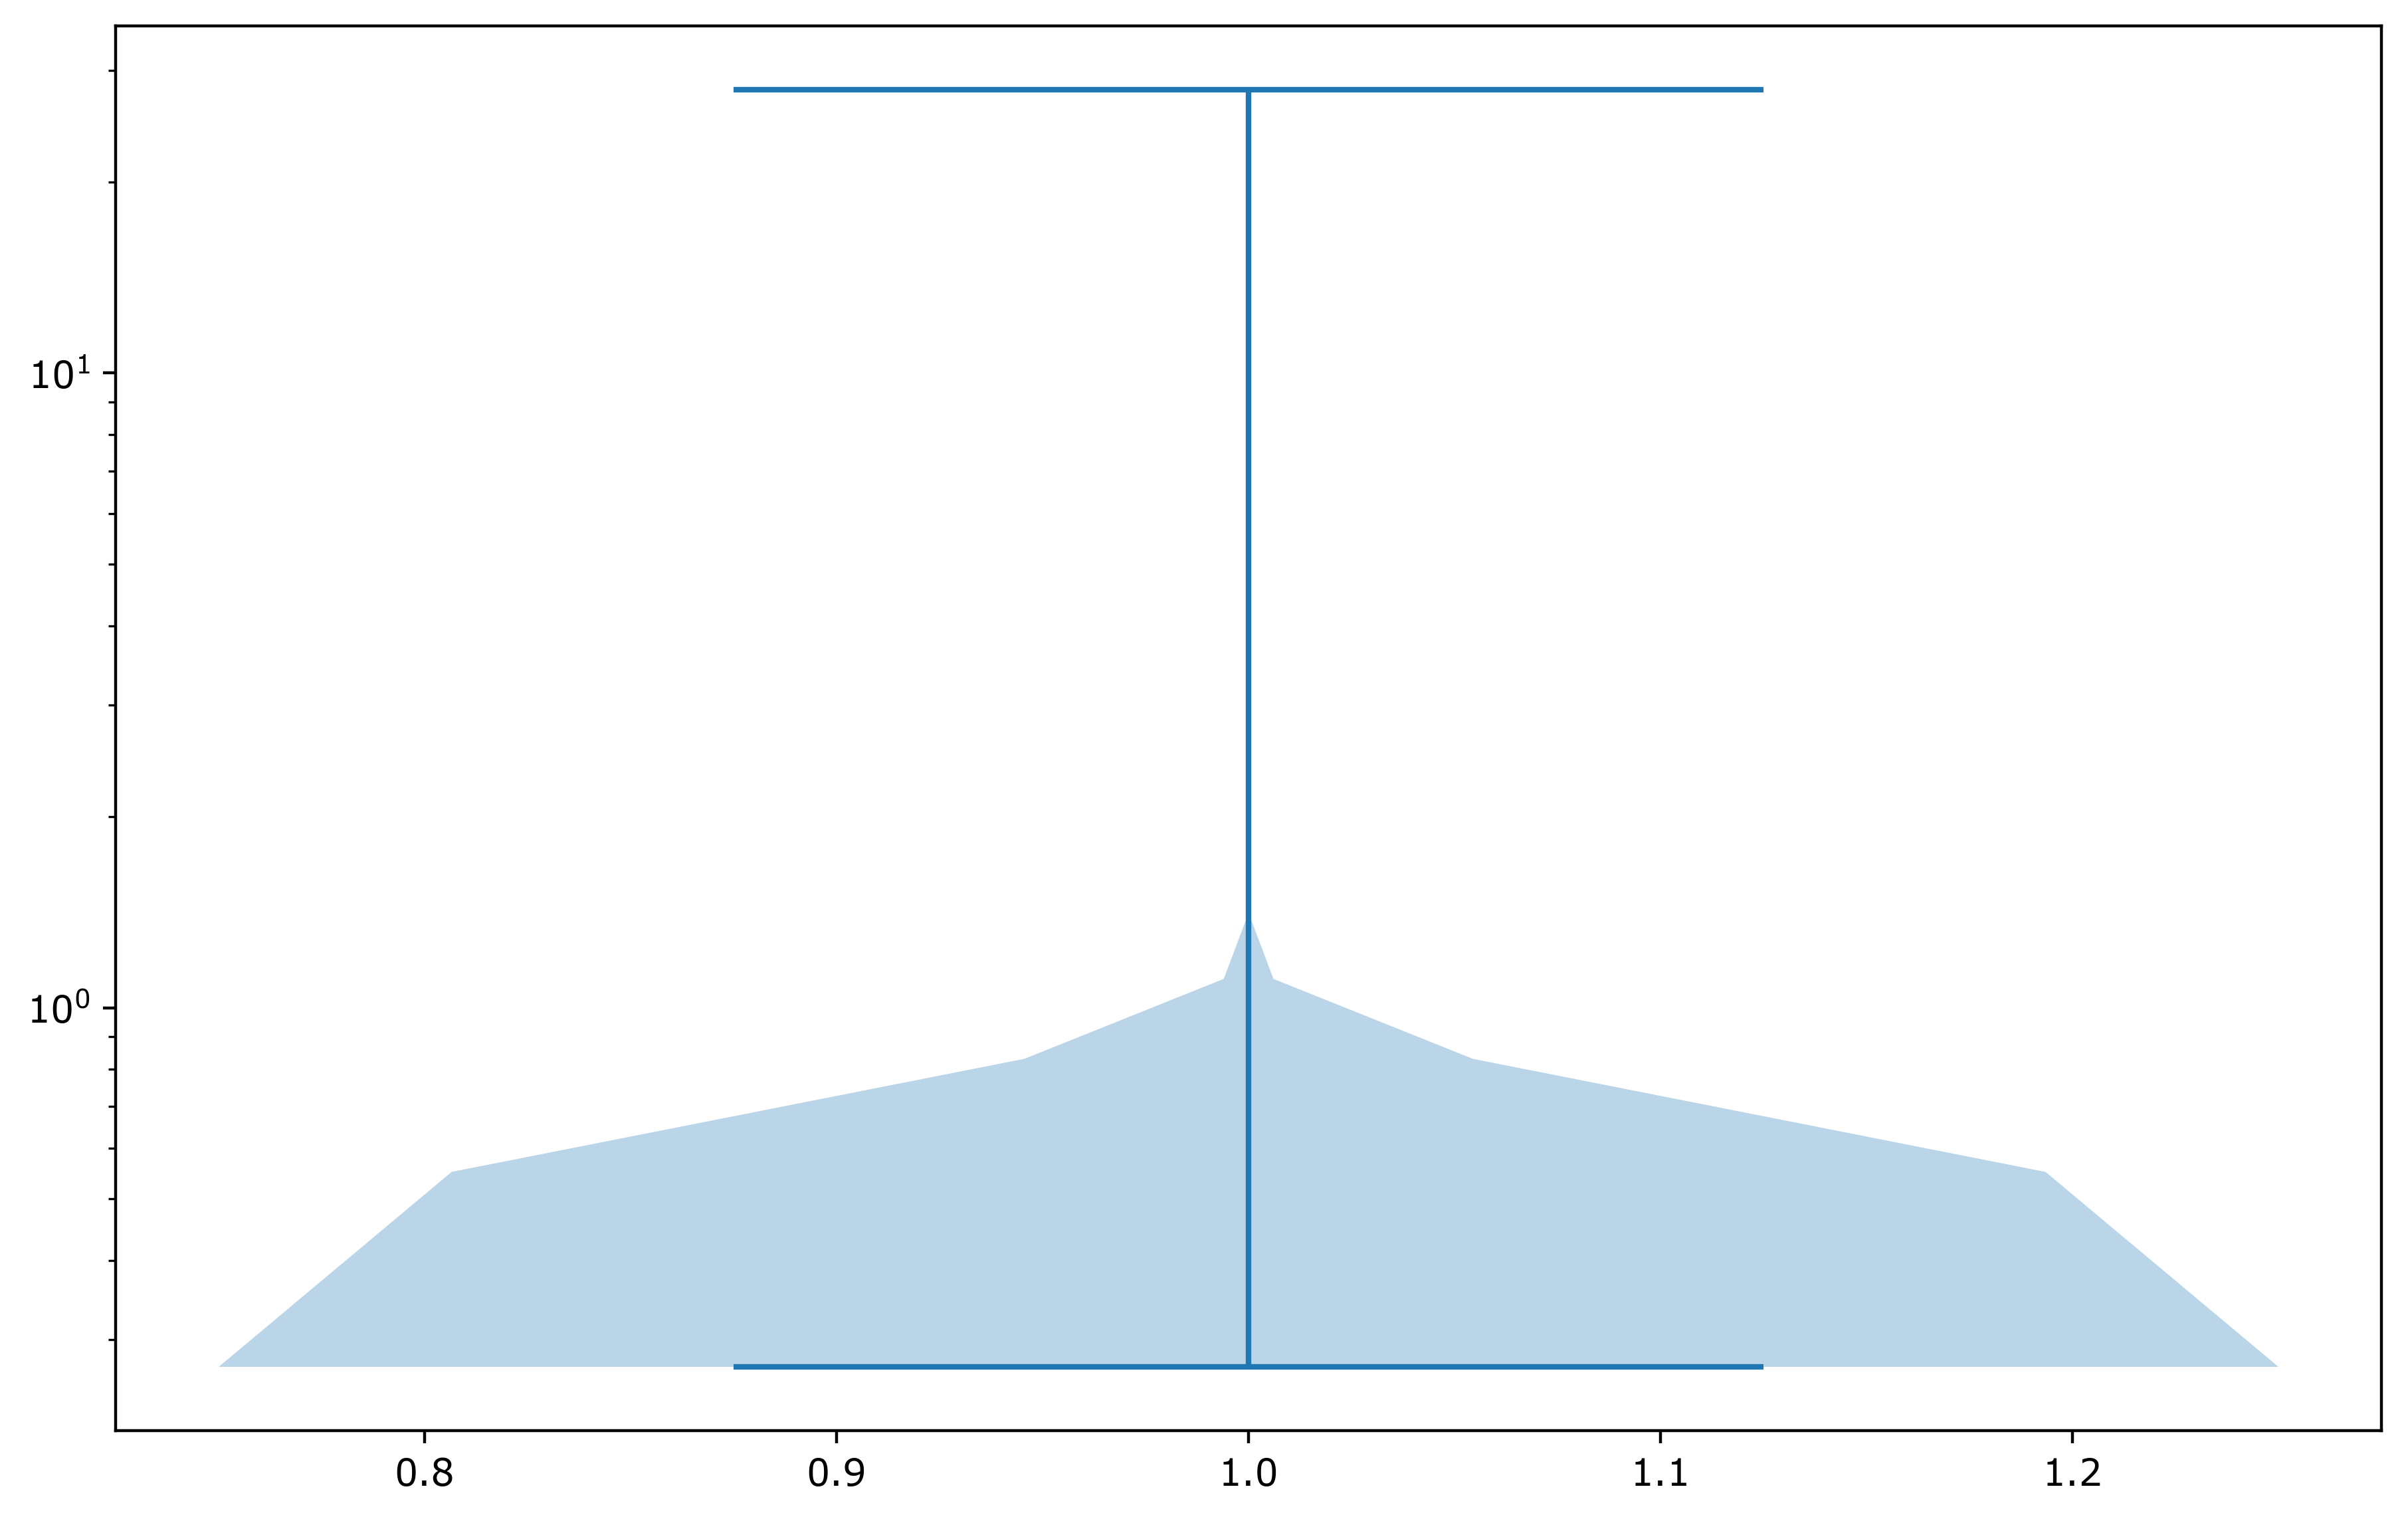

In [30]:
eg_100_data = pd.read_csv("execution_graph_length_100.csv")
eg_100_data.describe()

fig, axes = plt.subplots()
axes.violinplot(eg_100_data["EVENT_SERIALIZATION_DURATION"].values)
axes.set_yscale('log')
plt.show()

In [27]:
eg_10_data_mean = eg_10_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION", "EXECUTION_GRAPH_TRAVERSAL"]].mean().to_frame(name="10")
eg_100_data_mean = eg_100_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION", "EXECUTION_GRAPH_TRAVERSAL"]].mean().to_frame(name="100")

eg_10_data_std = eg_10_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION", "EXECUTION_GRAPH_TRAVERSAL"]].std().to_frame(name="10")
eg_100_data_std = eg_100_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION", "EXECUTION_GRAPH_TRAVERSAL"]].std().to_frame(name="100")



overhead_eg_mean = pd.concat([eg_10_data_mean, eg_100_data_mean], axis=1)
overhead_eg_std = pd.concat([eg_10_data_std, eg_100_data_std], axis=1)
print(overhead_eg_mean)
print(overhead_eg_std)

                                    10       100
ACTOR_CONSTRUCTION            0.009213  0.009052
ROUTING_DURATION              0.021656  0.020975
EVENT_SERIALIZATION_DURATION  0.104787  0.471556
STATE_SERIALIZATION_DURATION  0.038039  0.035874
EXECUTION_GRAPH_TRAVERSAL     0.088594  0.590048
                                    10       100
ACTOR_CONSTRUCTION            0.003264  0.004665
ROUTING_DURATION              0.006238  0.008299
EVENT_SERIALIZATION_DURATION  0.021434  1.702235
STATE_SERIALIZATION_DURATION  0.010917  0.011795
EXECUTION_GRAPH_TRAVERSAL     0.016173  0.073273


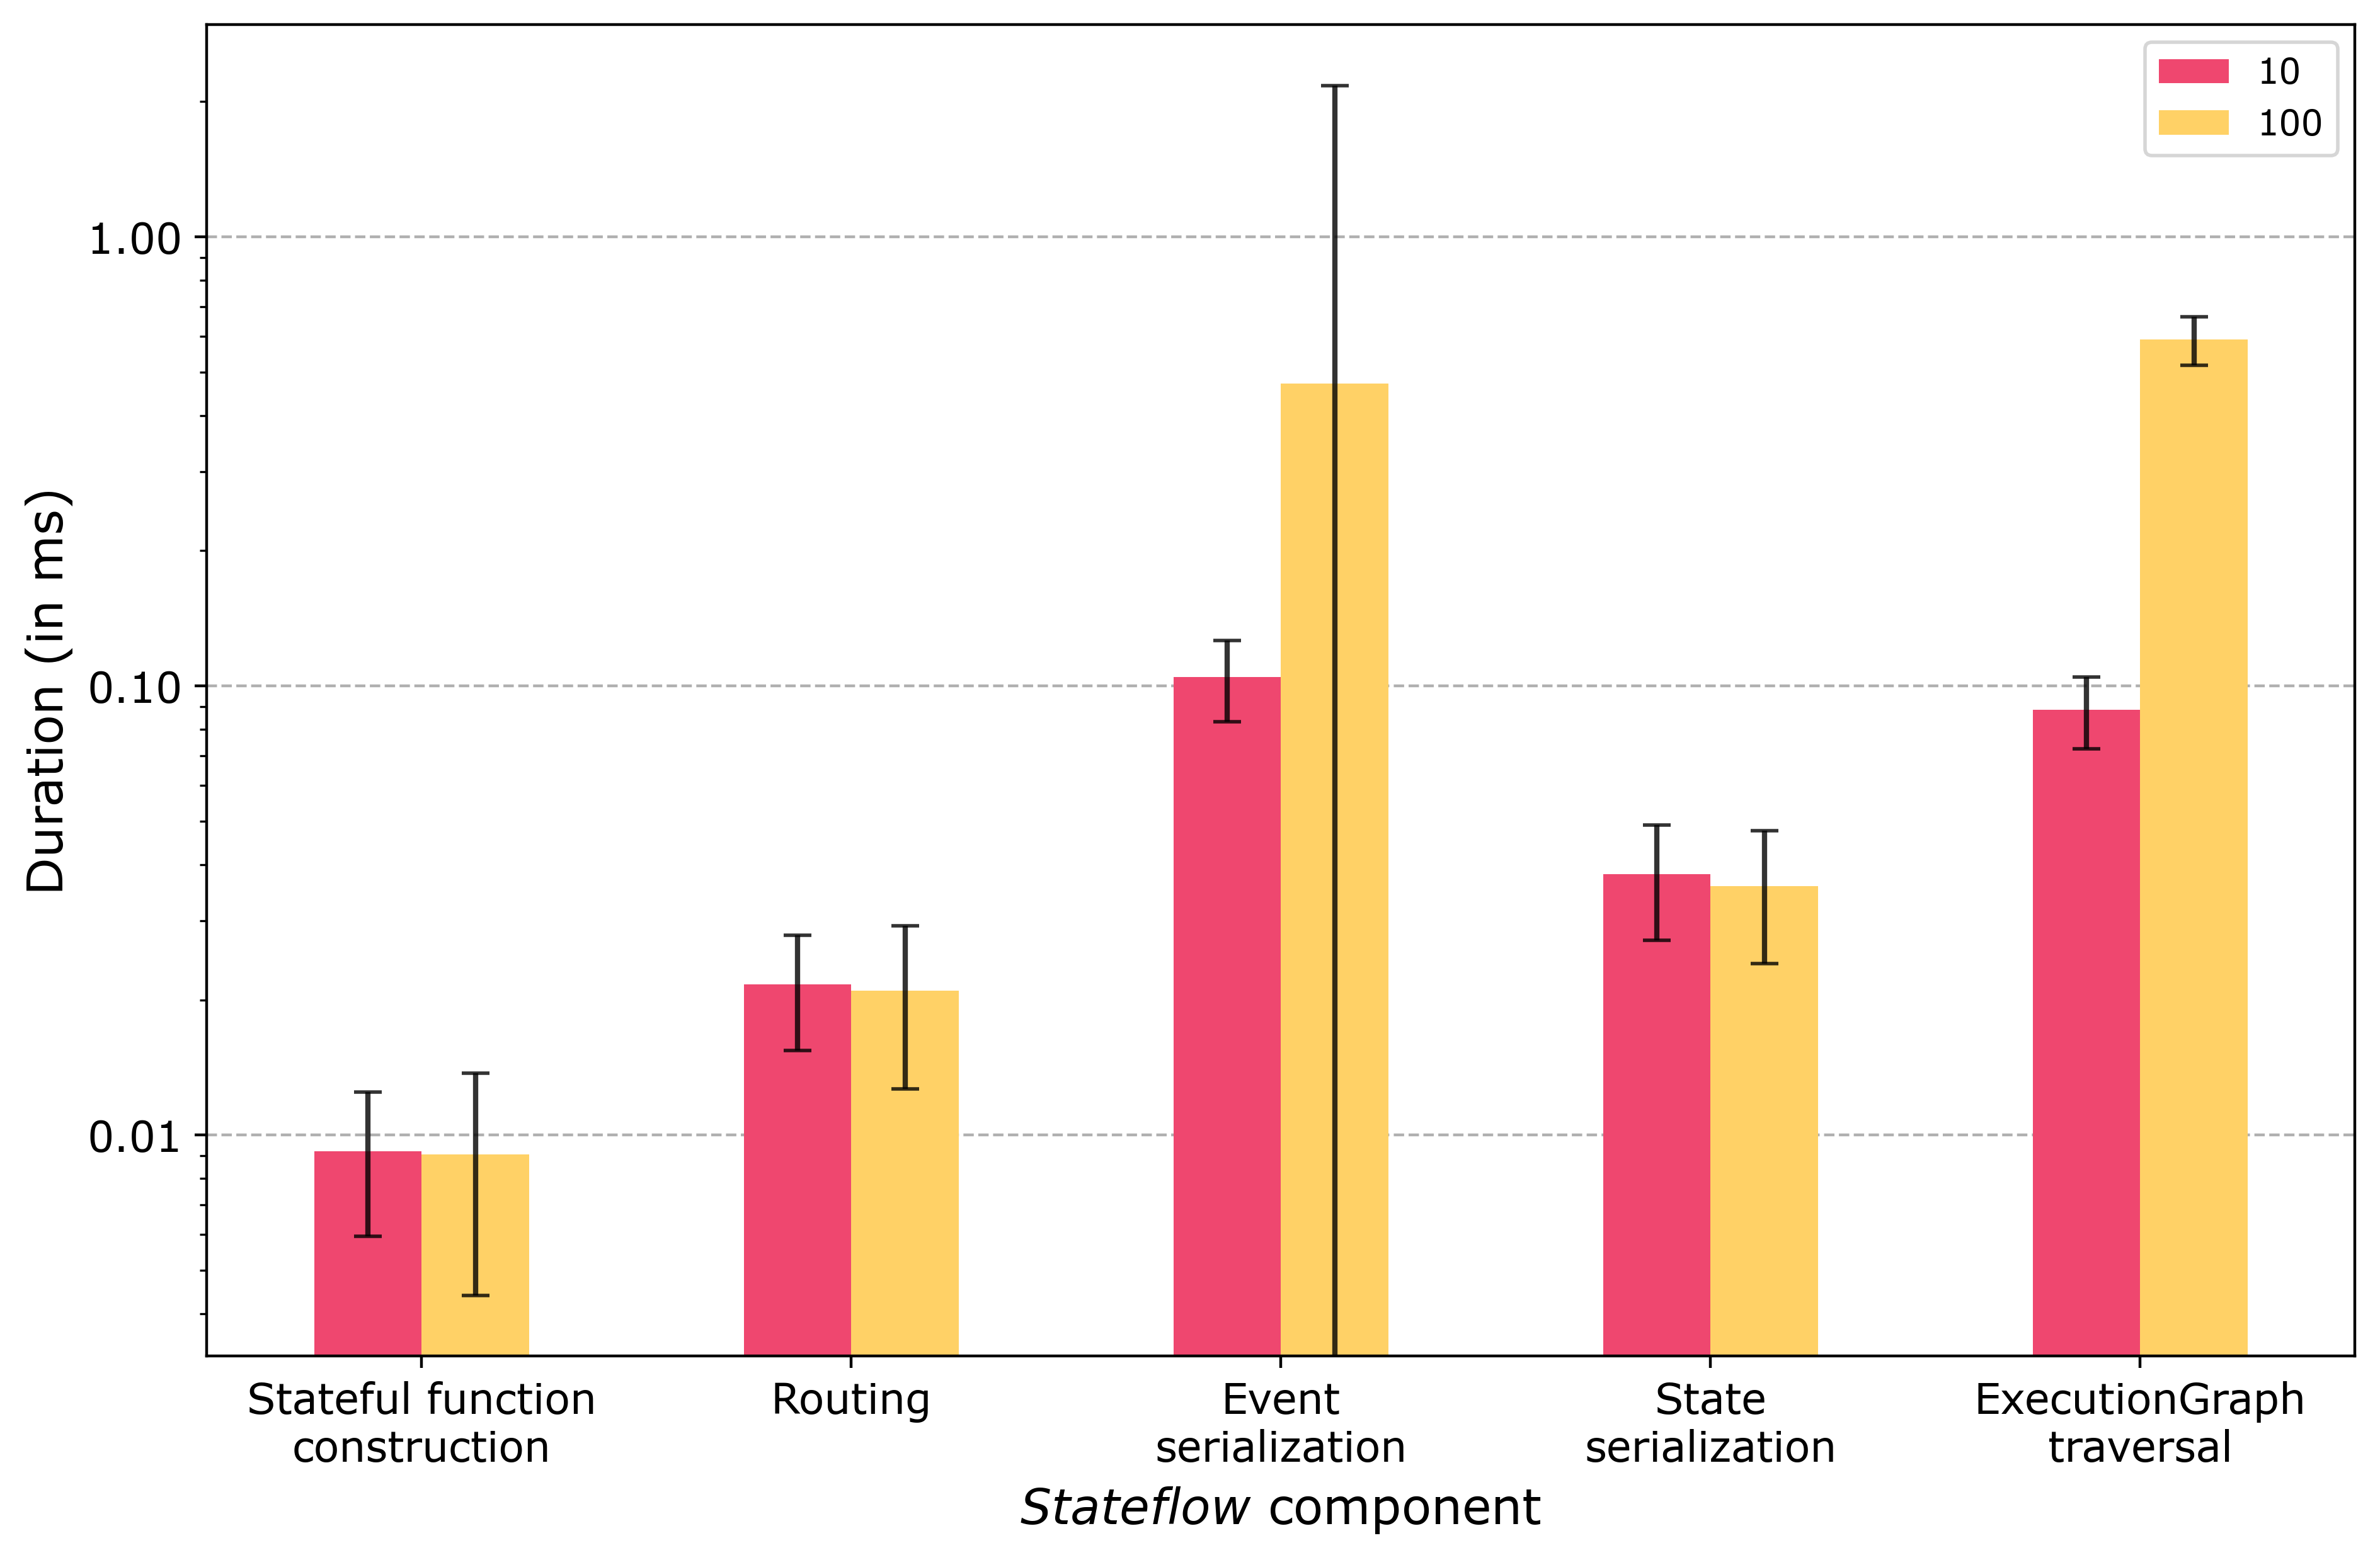

In [28]:
ax = overhead_eg_mean.plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=overhead_eg_std, rot=0, fontsize=12, capsize=4, ecolor='black', error_kw={"alpha": 0.80})
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
ax.set_yscale('log')
ax.set_ylabel("Duration (in ms)", fontsize=14)
ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
ax.set_xticklabels(["Stateful function\nconstruction", "Routing", "Event\nserialization", "State\nserialization", "ExecutionGraph\ntraversal"])
#ax.set_title(r"Duration of components in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))
plt.show()